# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
path = "/content/drive/My Drive/Colab Notebooks/Project - Computer Vision/Project - Face Recognition/Aligned Face Dataset from Pinterest.zip"

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
#### Add your code here ####
from zipfile import ZipFile
with ZipFile(path, "r") as zip:
  zip.extractall()

In [6]:
!ls

drive  pins  PINS  sample_data


In [7]:
ZipFile.namelist(zip)

['PINS/pins_Aaron Paul/Aaron Paul0_262.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul101_247.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul101_248.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul101_249.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul103_217.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul113_228.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul114_271.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul116_240.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul117_213.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul119_219.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul120_290.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul124_221.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul126_291.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul129_259.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul129_260.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul130_215.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul132_236.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul136_225.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul137_250.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul138_233.jpg',
 'PINS/pins_Aaron Paul/Aaron Paul140_243.jpg',
 'PINS/pins_Aar

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [10]:
#### Add your code here ####
load_image("PINS/pins_Aaron Paul/Aaron Paul0_262.jpg")

array([[[233, 188, 165],
        [231, 186, 163],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[232, 187, 164],
        [233, 188, 165],
        [220, 178, 156],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       [[230, 186, 161],
        [228, 184, 159],
        [206, 164, 140],
        ...,
        [106,  63,  72],
        [106,  63,  72],
        [106,  63,  72]],

       ...,

       [[198, 118,  91],
        [197, 120,  94],
        [195, 119,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[200, 120,  93],
        [200, 120,  93],
        [198, 121,  95],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]],

       [[201, 121,  94],
        [201, 121,  94],
        [199, 122,  96],
        ...,
        [ 78,  66,  76],
        [ 78,  66,  76],
        [ 78,  66,  76]]

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
#### Add your code here ####
model = vgg_face()
model.load_weights("/content/drive/My Drive/Colab Notebooks/Project - Computer Vision/Project - Face Recognition/vgg_face_weights.h5")

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [15]:
#### Add your code here ####
embeddings = []
o = metadata.shape
for i in range(o[0]):
  img_path = metadata[i].image_path()
  img = load_image(img_path)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))

  # Get the embedding vector for the above image using vgg_face_descriptor model
  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  
  # Create a list of embedded data
  embeddings.append(embedding_vector)

len(embeddings) 

10770

In [0]:
# Convert embeddings list to an embeddings numpy array
embeddings = np.array(embeddings)

In [17]:
print(embeddings)

[[ 0.00282955  0.00606645  0.01199943 ... -0.02102433  0.01037693
  -0.00856741]
 [ 0.00700805 -0.00727862  0.00389677 ... -0.00705684  0.02216661
   0.01492295]
 [ 0.00730084  0.00720173  0.00301433 ... -0.02576559  0.02130197
   0.03526447]
 ...
 [-0.00361491 -0.01182427  0.00079203 ... -0.01548262  0.0188532
   0.01456968]
 [-0.01145227  0.00634164  0.03221187 ... -0.03740558  0.02779899
   0.02838928]
 [ 0.00156992  0.00140222  0.00315576 ... -0.02341855  0.01767536
   0.02665265]]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

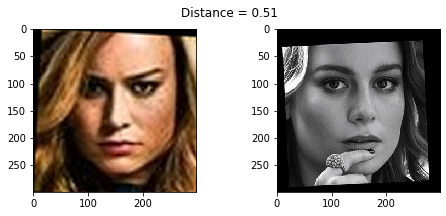

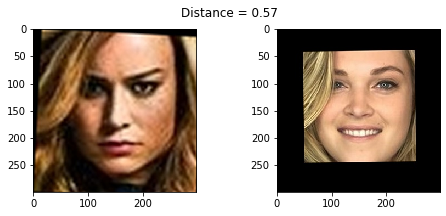

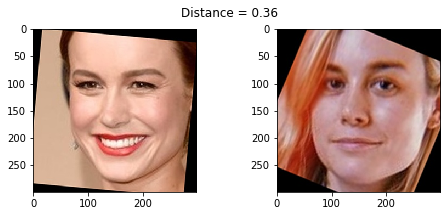

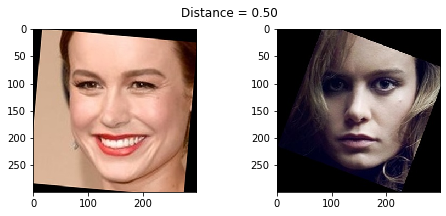

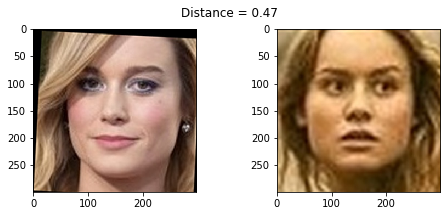

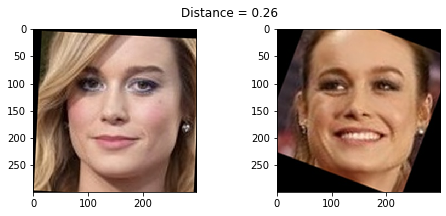

In [19]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####


In [0]:
# Code to extract the labels from the metadata

name_label = []
o = metadata.shape
for i in range(o[0]):
  string = str(metadata[i])
  string_list = string.split("/")
  name_label.append(string_list[1])

In [0]:
# converting the label into a numpy array
name_array = np.array(name_label)

In [0]:
# splitting the data into training and testing datasets
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
y_train = name_array[train_idx]
y_test = name_array[test_idx]

In [24]:
# printing the length of the datasets to ensure appropriate splitting of the training and testing datasets
print(len(metadata))
print(len(embeddings))
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

10770
10770
9573
9573
1197
1197


### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [26]:
# print the range of encoded data
print(min(y_train_encoded))
print(max(y_train_encoded))
print(min(y_test_encoded))
print(max(y_test_encoded))

0
99
0
99


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA

#### Add your code here ####
# Performing PCA to extract 2622 dimensions out of the 2622 input variables
pca = PCA(n_components=2622)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# Presenting the derived eigen values and vectors and the corresponding variation explained by them
print('Eigen Values')
print(pca.explained_variance_)
print('% of variation explained by each eigen value')
print(pca.explained_variance_ratio_)
print('Eigen vectors')
print(pca.components_)

Eigen Values
[3.5613177e+02 1.4051952e+02 1.0494430e+02 ... 4.3629898e-06 4.3389177e-06
 2.4119728e-07]
% of variation explained by each eigen value
[1.3581026e-01 5.3586878e-02 4.0020332e-02 ... 1.6638187e-09 1.6546390e-09
 9.1980173e-11]
Eigen vectors
[[-2.4034156e-02  8.7013841e-03 -3.3322871e-03 ... -8.0779074e-03
   2.0964790e-02  3.8790654e-02]
 [ 2.0741384e-02 -1.0973811e-03  8.6285770e-03 ... -2.3322912e-02
  -4.5043635e-03  1.1258270e-02]
 [ 2.6128297e-03  2.1705441e-03 -6.5635368e-03 ...  1.0569954e-02
  -1.1806164e-03 -1.6050475e-02]
 ...
 [ 8.8230212e-04 -1.1646514e-03 -8.3770335e-04 ...  2.0838645e-03
   1.1250079e-03  8.9644472e-04]
 [ 1.9660594e-04 -1.0360616e-03  5.8041222e-04 ... -1.2875948e-03
   5.0434325e-04  7.2765179e-05]
 [ 1.7110432e-02  2.0995690e-02  1.8682094e-02 ...  1.9375583e-02
   1.9118808e-02  2.3061365e-02]]


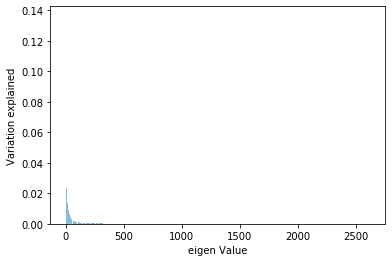

In [30]:
# Presenting a bar plot for the variabtion explained by each eigen value
plt.bar(list(range(1,2623)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

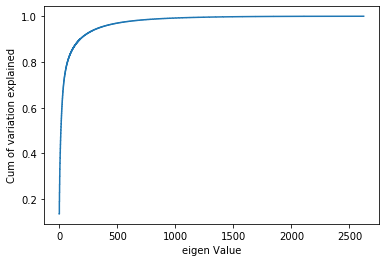

In [31]:
# Presenting an elbow plot for the variabtion explained by each eigen value
plt.step(list(range(1,2623)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As can be seen from the elbow plot 500 variables explain c.99% of the variation. I would go about creating input features using PCA with 500 input variables


In [32]:
#Creating training dataset with 500 input variables
pca500 = PCA(n_components=500)
pca500.fit(X_train_scaled)
print(pca500.components_)
print(pca500.explained_variance_ratio_)
X_train_pca500 = pca500.transform(X_train_scaled)

[[-0.0240341   0.00870125 -0.00333232 ... -0.00807794  0.02096477
   0.03879069]
 [ 0.02074144 -0.00109742  0.00862857 ... -0.02332291 -0.00450442
   0.0112582 ]
 [ 0.00261278  0.00217014 -0.00656346 ...  0.01056998 -0.00118092
  -0.01605079]
 ...
 [ 0.00482679 -0.01457724 -0.00875765 ...  0.01097726  0.00569125
  -0.00711374]
 [ 0.0360746   0.0225816   0.01808832 ... -0.01913565  0.00808611
   0.01091955]
 [ 0.04226071  0.00161966 -0.00495262 ... -0.03620358  0.00237138
  -0.00101971]]
[1.35810301e-01 5.35869710e-02 4.00203392e-02 3.66712026e-02
 3.41422372e-02 3.12487222e-02 2.58424580e-02 2.35521123e-02
 2.10382920e-02 1.94457490e-02 1.82003062e-02 1.70832276e-02
 1.66932736e-02 1.55952116e-02 1.42990416e-02 1.36432294e-02
 1.30002704e-02 1.21741025e-02 1.15088038e-02 1.13456398e-02
 1.09821772e-02 1.06243202e-02 9.60280839e-03 9.46356170e-03
 9.12798755e-03 8.83250497e-03 8.34724586e-03 7.69625418e-03
 7.59604154e-03 7.35668233e-03 7.00393273e-03 6.58718403e-03
 6.32594619e-03 6.25

In [33]:
#Creating test dataset with 500 input variables
pca500Test = PCA(n_components=500)
pca500Test.fit(X_test_scaled)
print(pca500Test.components_)
print(pca500Test.explained_variance_ratio_)
X_test_pca500 = pca500.transform(X_test_scaled)

[[-0.02252719  0.01006702 -0.00141433 ... -0.00947312  0.02432094
   0.03944396]
 [ 0.02055337 -0.00021443  0.0070947  ... -0.02233013 -0.00169695
   0.00970727]
 [ 0.00457883  0.00771223 -0.00135044 ...  0.01364859  0.00983752
  -0.00522825]
 ...
 [-0.01206778  0.05053244  0.02318684 ... -0.02834565 -0.00149487
  -0.01610839]
 [ 0.01710142 -0.02628544 -0.05788096 ...  0.00989601  0.01541389
   0.03851745]
 [ 0.01110523 -0.00644447  0.01940076 ... -0.02514056 -0.02421014
   0.01949357]]
[1.36128590e-01 5.64140789e-02 3.82830389e-02 3.82087789e-02
 3.44792306e-02 3.22312191e-02 2.57663466e-02 2.36511212e-02
 2.09309962e-02 1.93510335e-02 1.84961781e-02 1.73552055e-02
 1.62784439e-02 1.58844348e-02 1.45956678e-02 1.39585845e-02
 1.36363599e-02 1.33347344e-02 1.21476082e-02 1.15989819e-02
 1.05528776e-02 1.02750082e-02 9.70637705e-03 9.54238791e-03
 9.27883014e-03 8.47999658e-03 8.40705261e-03 7.82045256e-03
 7.45666400e-03 7.25714117e-03 6.88359234e-03 6.87393826e-03
 6.47320691e-03 6.27

In [34]:
print(X_train_pca500.shape)
print(X_test_pca500.shape)

(9573, 500)
(1197, 500)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [35]:
from sklearn.svm import SVC

#### Add your code here ####
# iterating for various combinations of c-value for the svc models
from sklearn import metrics
from sklearn.metrics import accuracy_score

svc_model = SVC(kernel='rbf', C = 99)
svc_model.fit(X_train_pca500, y_train_encoded)
y_pred_svc = svc_model.predict(X_test_pca500)
scores = accuracy_score(y_test_encoded, y_pred_svc)
print(scores)

0.9649122807017544


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

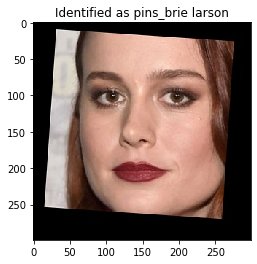

In [38]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
#### Add your code here ####
example_prediction = svc_model.predict(np.expand_dims(X_test_pca500[10], axis = 0))
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

Summary of steps executed to complete the project:
1. I loaded the image data from the zip files
2. Using the codes already provided in the project file I extracted the metadata for a sample image.
3. Using the VGG face model architecture and after loading the weights given I created a for loop to extract 2622 features (embeddings) for all the 10,770 image files.
4. Also extracted the image label from the metadata and had 99 different celebrity name labels.
5. Split the data into training and test set based on the crieteria provided.
6. Encoded the labels and scaled the input variables to their z-scores.
7. Used PCA and reduced the dimensions from 2622 to 500.
8. Built a SVC classifier for 99 classes and acheived an accuracy score of 96.49%
9. Also identified the 10th image file in the test set correctly as the image of Brie Larson.
